## 악성사이트 탐지 데이터 전처리

#### 라이브러리 import 및 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

In [4]:
df = pd.read_csv('train.csv')

- 데이터 단변량 분석하기

In [5]:
df['url_len'].describe()

count    3664.000000
mean       54.559225
std        82.493265
min         6.000000
25%        24.000000
50%        36.000000
75%        55.000000
max      1837.000000
Name: url_len, dtype: float64

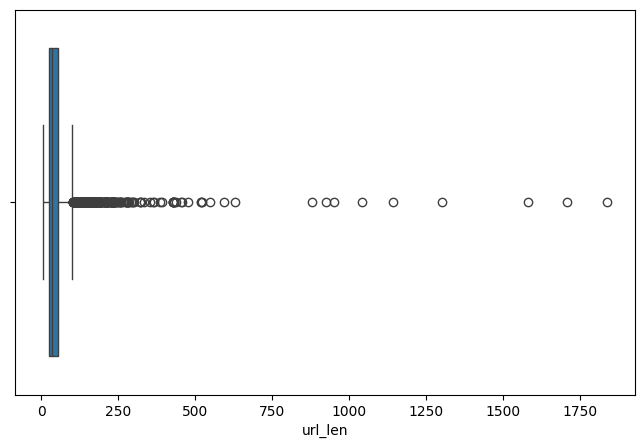

In [6]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = df['url_len'])
plt.show()

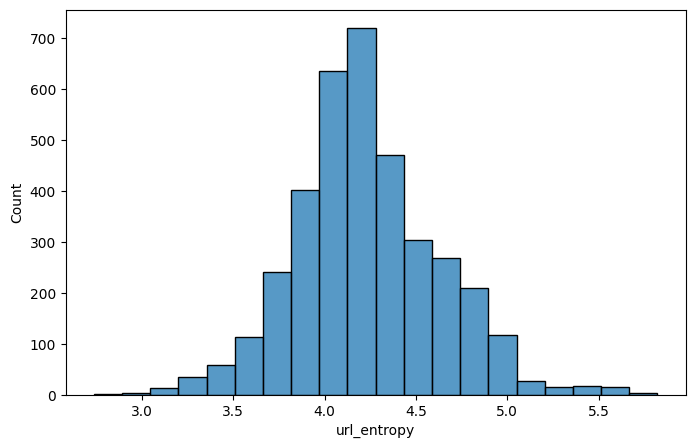

In [7]:
plt.figure(figsize = (8, 5))
sns.histplot(x = df['url_entropy'], bins = 20)
plt.show()

C:\Users\juh03\AppData\Local\Temp\ipykernel_1704\3509627448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['label'], palette='viridis')


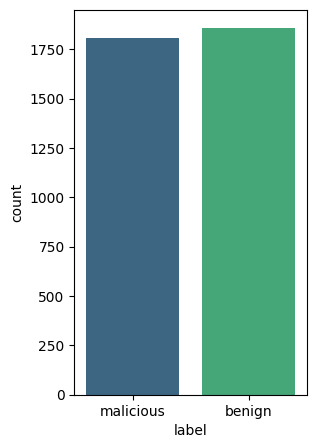

In [8]:
plt.figure(figsize = (3, 5))
sns.countplot(x = df['label'], palette='viridis')
plt.show()

- 데이터 이변량 분석하기

In [9]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

def Multivariate(feature, target, data):
    d_data = data.dropna()
    if d_data[feature].nunique() <= 2:
        table = pd.crosstab(d_data[feature], d_data[target])
        print(feature)
        print(spst.chi2_contingency(table))
    else:
        X = sm.add_constant(d_data[feature])
        Y = np.where(d_data[target] == 'benign', 0, 1)
        model = sm.Logit(Y, X)
        logit_res = model.fit(disp = 0)
        print(feature)
        print(logit_res.summary())

In [10]:
target = 'label'
for col in df.columns:
    Multivariate(col, target, df)

url_len
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3662
Model:                          Logit   Df Residuals:                     3660
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:               3.909e-05
Time:                        15:27:48   Log-Likelihood:                -2537.9
converged:                       True   LL-Null:                       -2538.0
Covariance Type:            nonrobust   LLR p-value:                    0.6560
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0371      0.040     -0.934      0.350      -0.115       0.041
url_len        0.0002      0.000      0.445      0.657      -0.001       0.001
url_num_hyphens_dom
                        

c:\Users\juh03\anaconda3\envs\project\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\juh03\anaconda3\envs\project\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


url_ip_present
Chi2ContingencyResult(statistic=22.156848408009076, pvalue=2.5125807608020703e-06, dof=1, expected_freq=array([[1743.48443474, 1696.51556526],
       [ 112.51556526,  109.48443474]]))
url_entropy
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3662
Model:                          Logit   Df Residuals:                     3660
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                 0.02017
Time:                        15:27:48   Log-Likelihood:                -2486.8
converged:                       True   LL-Null:                       -2538.0
Covariance Type:            nonrobust   LLR p-value:                 4.618e-24
                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [11]:
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [12]:
target = 'label'

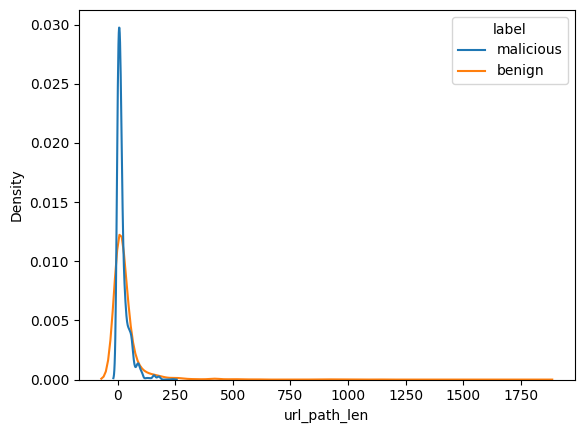

In [13]:
sns.kdeplot(x = 'url_path_len', data = df, hue = target, common_norm = False)
plt.show()

In [14]:
pd.crosstab(df[target], df['url_ip_present'])

url_ip_present,0.0,1.0
label,,
benign,1710,148
malicious,1731,75


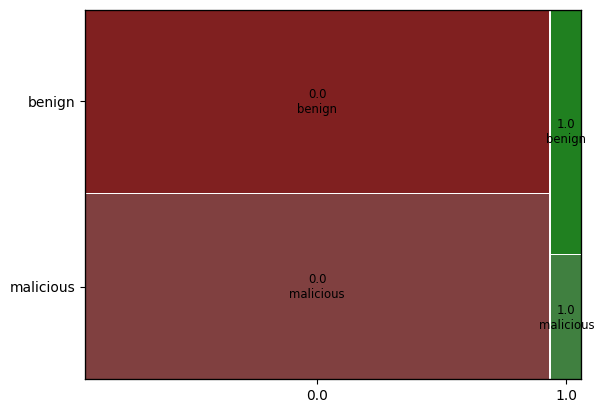

In [15]:
mosaic(df, ['url_ip_present',target])
# plt.axhline(1- df[target].mean(), color = 'r')
plt.show()

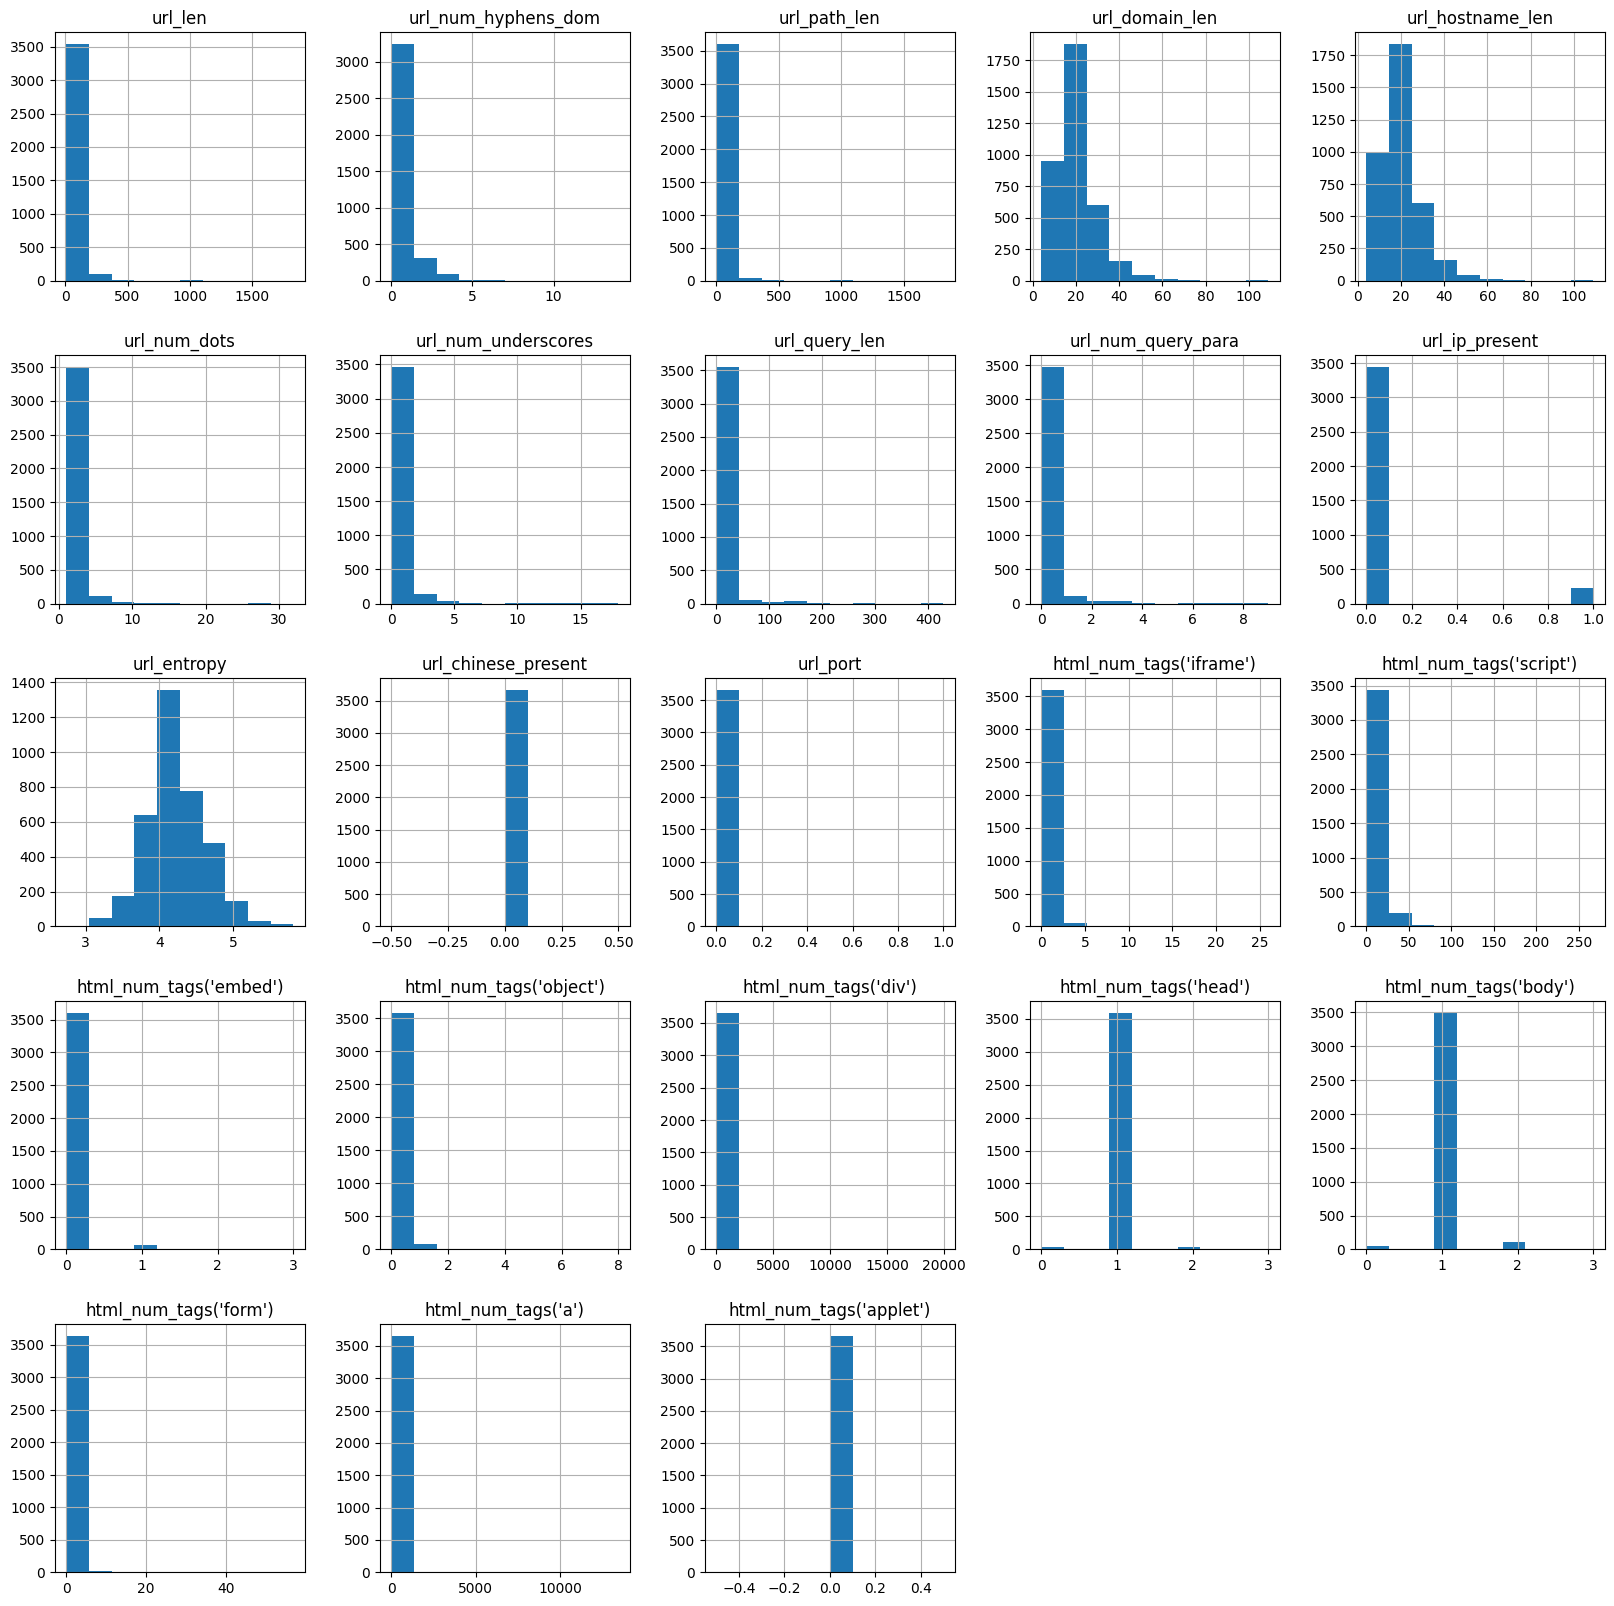

In [16]:
df.hist(bins = 10, grid = True, figsize = (20, 20))
plt.show()

In [17]:
df.describe(include = 'all')

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
count,3664.000000,3664.000000,3663.000000,3663.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,...,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.0,3664
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,benign
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1858
mean,54.559225,0.412937,29.365820,20.383292,20.330513,2.516921,0.272653,4.707697,0.104258,0.060862,...,8.785480,0.018013,0.028930,70.843886,0.998090,1.016648,1.028930,66.182860,0.0,NaN
std,82.493265,0.847058,78.595248,9.597012,9.628093,1.534119,1.124592,25.318285,0.574310,0.239110,...,12.647356,0.144808,0.237682,365.593304,0.144974,0.225330,1.563903,342.651459,0.0,NaN
min,6.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
25%,24.000000,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.0,NaN
50%,36.000000,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000,0.0,NaN
75%,55.000000,1.000000,31.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000,0.0,NaN
